In [59]:
# imports for diffusion map
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy import sparse

# imports for plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

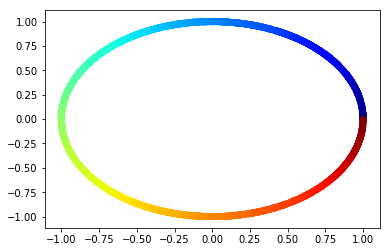

In [60]:
'''Example 1: the circle (S1)'''

# number of points
n = 2000

# dimension of embedding
d = 3

# number of neighbours
k = 12

# sample from S1
theta = np.sort(np.random.rand(n, 1), axis=0)
data = np.concatenate((np.cos(2 * np.pi * theta), np.sin(2 * np.pi * theta)), axis=1)

# visualize sampled points
plt.scatter(data[:, 0], data[:, 1], c=np.linspace(0, 1, n), cmap='jet')
plt.show()

In [47]:
'''all-purpose diffusion map code'''

# number of points
n = data.shape[0];

# neighbour search (replace with your favourite algorithm)
knn = NearestNeighbors(n_neighbors=k).fit(data)
_, jj = knn.kneighbors(data)
ii = np.repeat(range(0, n), k)

# affinity matrix (W(x, y) is the number of neighbours x and y have in common)
W = sparse.coo_matrix((np.ones(n * k), (ii, jj.ravel())))
W = W * W.transpose()

# alpha normalization (cancels non-uniform density)
D = sparse.diags(1 / W.sum(axis=1).A.ravel())
W = D * W * D

# isotropic kernel P = I - L^sym <-- symmetric normalized graph laplacian
D = sparse.diags(1 / np.sqrt(W.sum(axis=1)).A.ravel())
P = D * W * D

# eigendecomposition
_, E = sparse.linalg.eigsh((P + P.transpose()) / 2, k=d+1, which='LM')

# shift back to get diffusion embedding (unnormalized eigenvectors of diffusion kernel)
E = D * E[:, :-1]

# visualize embedding
if d < 3:
    plt.scatter(E[:, 0], E[:, 1], c=np.linspace(0, 1, n), cmap='jet')
else:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(E[:, 0], E[:, 1], E[:, 2], c=np.linspace(0, 1, n), cmap='jet')
  
plt.show()

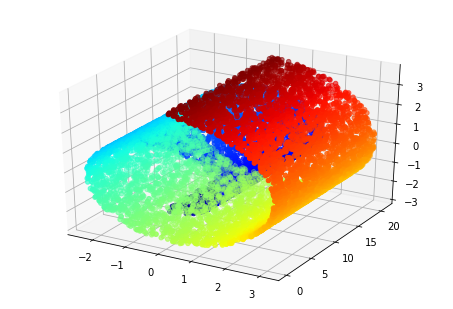

In [61]:
'''Example 2: the Swiss roll'''

# number of points
n = 10000

# number of neighbours
k = 15

# dimension of embedding
d = 2

# sample from swiss roll
theta = np.zeros((n, 1));
i = 0
while i < n:
    xvec = np.random.rand(1)
    yvec = np.random.rand(1)
    fx = np.divide(np.sqrt(9.0*(2.0*np.pi*xvec+np.pi)**2+4.0), np.sqrt(4.0+81.0*np.pi**2));
    if yvec < fx:
        theta[i] = xvec
        i += 1
    else:
        continue
        
t = np.sort(theta, axis=0);
s = 21*np.random.rand(n,1);
x = 3*np.pi*(1+2*t)/8.*np.cos(3*np.pi*(1+2*t)/2);
y = s;
z = 3*np.pi*(1+2*t)/8.*np.sin(3*np.pi*(1+2*t)/2);
data = np.concatenate((x, y, z), axis=1)

# visualize sampled points
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=np.linspace(0, 1, n), cmap='jet')
plt.show()


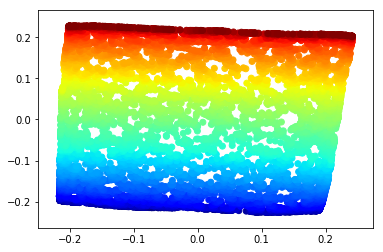

In [62]:
'''all-purpose diffusion map code'''

# number of points
n = data.shape[0];

# neighbour search (replace with your favourite algorithm)
knn = NearestNeighbors(n_neighbors=k).fit(data)
_, jj = knn.kneighbors(data)
ii = np.repeat(range(0, n), k)

# affinity matrix (W(x, y) is the number of neighbours x and y have in common)
W = sparse.coo_matrix((np.ones(n * k), (ii, jj.ravel())))
W = W * W.transpose()

# alpha normalization (cancels non-uniform density)
D = sparse.diags(1 / W.sum(axis=1).A.ravel())
W = D * W * D

# isotropic kernel P = I - L^sym <-- symmetric normalized graph laplacian
D = sparse.diags(1 / np.sqrt(W.sum(axis=1)).A.ravel())
P = D * W * D

# eigendecomposition
_, E = sparse.linalg.eigsh((P + P.transpose()) / 2, k=d+1, which='LM')

# shift back to get diffusion embedding (unnormalized eigenvectors of diffusion kernel)
E = D * E[:, :-1]

# visualize embedding
if d < 3:
    plt.scatter(E[:, 0], E[:, 1], c=np.linspace(0, 1, n), cmap='jet')
else:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(E[:, 0], E[:, 1], E[:, 2], c=np.linspace(0, 1, n), cmap='jet')
  
plt.show()